# Image IPP coding

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --

## Without I-type blocks

In [49]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [50]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP
#import MP4 as IPP


In [51]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4415982744107744 KBPS: 4029.072 Average AMSE: 49.7563548900463
     2	Q_step: 24 BPP: 0.3277172769360269 KBPS: 2990.04 Average AMSE: 77.0008304617354
     3	Q_step: 27 BPP: 0.23674856200897867 KBPS: 2160.056 Average AMSE: 124.58244346678589
     4	Q_step: 30 BPP: 0.1661765221661055 KBPS: 1516.168 Average AMSE: 203.39484493371216
     5	Q_step: 33 BPP: 0.11386609147025814 KBPS: 1038.896 Average AMSE: 324.48683054503374
     6	Q_step: 36 BPP: 0.07825126262626263 KBPS: 713.952 Average AMSE: 483.44873967539985
     7	Q_step: 39 BPP: 0.056442901234567903 KBPS: 514.976 Average AMSE: 650.7225844600521


In [52]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [53]:
!cat /tmp/curve_no_intrablocks.txt

0.4415982744107744	49.7563548900463
0.3277172769360269	77.0008304617354
0.23674856200897867	124.58244346678589
0.1661765221661055	203.39484493371216
0.11386609147025814	324.48683054503374
0.07825126262626263	483.44873967539985
0.056442901234567903	650.7225844600521


In [54]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [62]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [63]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP
#import MP4 as IPP


In [64]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.438279496352413 KBPS: 3998.7920000000004 Average AMSE: 40.97219153338946
     2	Q_step: 24 BPP: 0.3275550645342312 KBPS: 2988.56 Average AMSE: 63.58114324670316
     3	Q_step: 27 BPP: 0.23963155864197533 KBPS: 2186.3599999999997 Average AMSE: 99.81794540456649
     4	Q_step: 30 BPP: 0.17150059624017958 KBPS: 1564.7440000000001 Average AMSE: 156.88415425960997
     5	Q_step: 33 BPP: 0.12153303872053872 KBPS: 1108.8480000000002 Average AMSE: 239.72344352816359
     6	Q_step: 36 BPP: 0.08728079405162739 KBPS: 796.3359999999999 Average AMSE: 350.3104936079545
     7	Q_step: 39 BPP: 0.06542683782267115 KBPS: 596.9440000000001 Average AMSE: 496.22877867213805


In [65]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [66]:
!cat /tmp/curve_with_intrablocks.txt

0.438279496352413	40.97219153338946
0.3275550645342312	63.58114324670316
0.23963155864197533	99.81794540456649
0.17150059624017958	156.88415425960997
0.12153303872053872	239.72344352816359
0.08728079405162739	350.3104936079545
0.06542683782267115	496.22877867213805


In [59]:
!cat /tmp/curve_with_intrablocks.txt

0.4325932940516274	36.37629167105078
0.3237663089225589	57.96028821198093
0.23818655303030303	93.00110326353816
0.17251245089786757	149.3875443892046
0.12660458754208756	238.73755995282687
0.09248035914702582	359.25495427363916
0.06946285774410774	508.9546363154111


In [67]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

## MP4

In [15]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as IPP\n/\nimport MP4 as IPP\n/g' RD_curve.py

In [16]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
#import image_IPP_adaptive as IPP
import MP4 as IPP


In [17]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enabl

frame=   30 fps=0.0 q=-1.0 Lsize=     161kB time=00:00:01.16 bitrate=1138.5kbits/s speed=5.04x    
video:160kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.587343%
[libx264 @ 0x560221605240] frame I:1     Avg QP:26.98  size: 18533
[libx264 @ 0x560221605240] frame P:29    Avg QP:27.17  size:  4999
[libx264 @ 0x560221605240] mb I  I16..4:  1.3% 65.9% 32.8%
[libx264 @ 0x560221605240] mb P  I16..4:  0.1%  0.5%  0.5%  P16..4: 37.4% 31.8% 23.6%  0.0%  0.0%    skip: 6.0%
[libx264 @ 0x560221605240] 8x8 transform intra:60.7% inter:51.2%
[libx264 @ 0x560221605240] coded y,u,v intra: 93.5% 47.4% 33.1% inter: 50.8% 6.0% 3.5%
[libx264 @ 0x560221605240] i16 v,h,dc,p: 33% 67%  0%  0%
[libx264 @ 0x560221605240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 21% 16% 20%  5%  7%  6%  8%  6% 11%
[libx264 @ 0x560221605240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 27% 38%  9%  3%  5%  4%  5%  4%  5%
[libx264 @ 0x560221605240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x560221605240] ref P L0: 64

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=7.32x    
video:6572kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

[libx264 @ 0x55f6a44a6240] using SAR=128/117
[libx264 @ 0x55f6a44a6240] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55f6a44a6240] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55f6a44a6240] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=25.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv4

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enabl

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed= 7.2x    
video:6330kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=      60kB time=00:00:01.16 bitrate= 423.4kbits/s speed=6.68x    
video:59kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.595155%
[libx264 @ 0x560d4f661240] frame I:1     Avg QP:33.98  size:  9220
[libx264 @ 0x560d4f661240] frame P:29    Avg QP:34.31  size:  1744
[libx264 @ 0x560d4f661240] mb I  I16..4:  5.1% 69.2% 25.8%
[libx264 @ 0x560d4f661240] mb P  I16..4:  0.2%  0.3%  0.3%  P16..4: 41.0% 19.5% 10.8%  0.0%  0.0%    skip:27.8%
[libx264 @ 0x560d4f661240] 8x8 transform intra:62.5% inter:61.9%
[libx264 @ 0x560d4f661240] coded y,u,v intra: 81.6% 26.7% 20.1% inter: 20.3% 2.1% 1.5%
[libx264 @ 0x560d4f661240] i16 v,h,dc,p: 38% 47%  9%  6%
[libx264 @ 0x560d4f661240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 18% 20% 22%  5%  6%  6%  7%  6% 10%
[libx264 @ 0x560d4f661240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 32% 30% 13%  3%  5%  5%  4%  4%  4%
[libx264 @ 0x560d4f661240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x560d4f661240] ref P L0: 69.

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=7.47x    
video:6131kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55d3b3f43240] using SAR=128/117
[libx264 @ 0x55d3b3f43240] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55d3b3f43240] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55d3b3f43240] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=32.0 

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enabl

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.08x    
video:5712kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=      25kB time=00:00:01.16 bitrate= 176.2kbits/s speed=8.51x    
video:24kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.924679%
[libx264 @ 0x5634bfc98240] frame I:1     Avg QP:40.94  size:  3654
[libx264 @ 0x5634bfc98240] frame P:29    Avg QP:41.51  size:   700
[libx264 @ 0x5634bfc98240] mb I  I16..4: 11.9% 71.2% 16.9%
[libx264 @ 0x5634bfc98240] mb P  I16..4:  0.4%  0.7%  0.1%  P16..4: 38.8%  7.4%  3.2%  0.0%  0.0%    skip:49.4%
[libx264 @ 0x5634bfc98240] 8x8 transform intra:67.3% inter:79.9%
[libx264 @ 0x5634bfc98240] coded y,u,v intra: 55.4% 14.0% 13.7% inter: 7.9% 1.1% 0.9%
[libx264 @ 0x5634bfc98240] i16 v,h,dc,p: 25% 51% 14% 10%
[libx264 @ 0x5634bfc98240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 25% 21% 26%  4%  4%  4%  4%  4%  6%
[libx264 @ 0x5634bfc98240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 30% 24% 22%  4%  5%  4%  5%  4%  4%
[libx264 @ 0x5634bfc98240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x5634bfc98240] ref P L0: 75.5

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.16x    
video:5314kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

[libx264 @ 0x55952ebb4240] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55952ebb4240] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=39.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv444p, 352x288 [SAR 128:117 DAR 1408:1053], q=-1--1, 25 fps, 12800 tbn, 25 tbc
    Metadata:
      encoder         : Lavc58.91.100 libx264
    S

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enabl

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.96x    
video:4743kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
     1	Q_step: 21 BPP: 0.1676373106060606 KBPS: 1529.496 Average AMSE: 30.738501551978118
     2	Q_step: 22 BPP: 0.14475747053872054 KBPS: 1320.744 Average AMSE: 35.5654305643238
     3	Q_step: 23 BPP: 0.12556379769921436 KBPS: 1145.624 Average AMSE: 41.24144033652497
     4	Q_step: 24 BPP: 0.10806151795735129 KBPS: 985.936 Average AMSE: 47.725119028829944
     5	Q_step: 25 BPP: 0.09403759820

In [18]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_MP4.txt

In [19]:
!cat /tmp/curve_MP4.txt

0.1676373106060606	30.738501551978118
0.14475747053872054	35.5654305643238
0.12556379769921436	41.24144033652497
0.10806151795735129	47.725119028829944
0.09403759820426487	54.886689595608864
0.08160072951739618	63.78588412335158
0.07132873877665544	73.63353763327721
0.06198004349046016	85.00430553363498
0.05383435044893378	98.42357022920173
0.04731867283950617	113.35061147499297
0.041472011784511785	131.19890594311164
0.03662931397306397	151.2530710753367
0.032039141414141416	175.44779128086418
0.0282810746352413	201.88563587261507
0.025081544612794614	229.3013450476992
0.02240547839506173	259.651842645202
0.019652251683501685	296.32080111005894
0.017678521324354657	334.0789009890572
0.01577493686868687	380.47030066287886
0.01419665404040404	420.943312684133
0.012987514029180696	474.11957805047


In [20]:
RD_points_MP4 = []
with open("/tmp/curve_MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_MP4.append((float(rate), float(_distortion)))

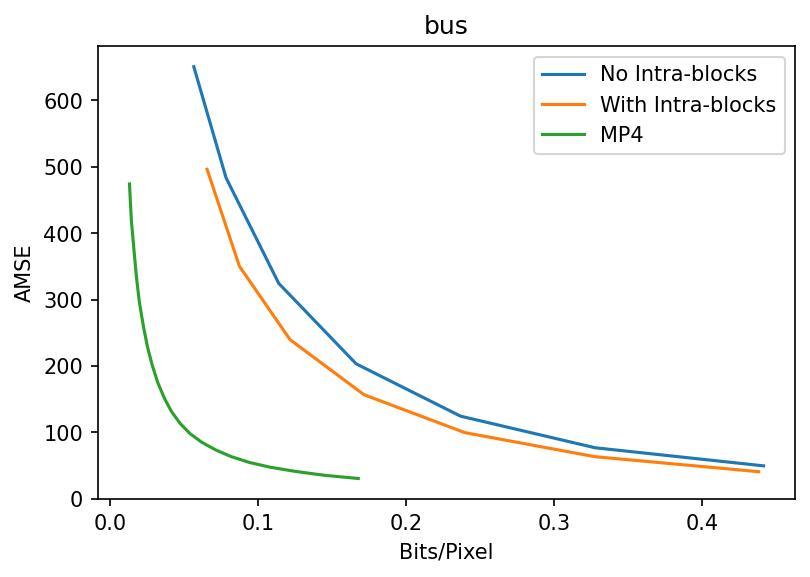

In [68]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

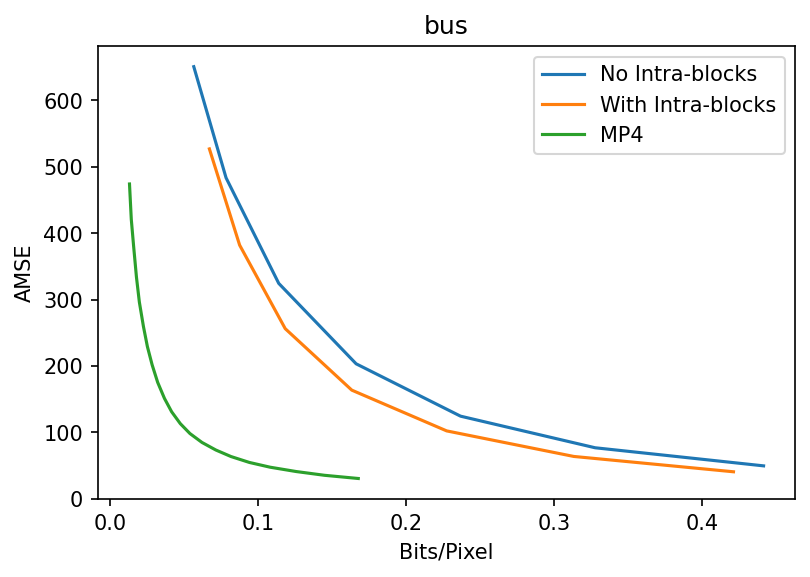

In [48]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()